In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [10]:
mnist = input_data.read_data_sets('..\\tmp\\data\\', one_hot=True)

learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input]))
}

Extracting ..\tmp\data\train-images-idx3-ubyte.gz
Extracting ..\tmp\data\train-labels-idx1-ubyte.gz
Extracting ..\tmp\data\t10k-images-idx3-ubyte.gz
Extracting ..\tmp\data\t10k-labels-idx1-ubyte.gz


In [11]:
def encoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    
    return layer_2
    
def decoder(x):
    
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
  
    return layer_2
                    
encoder_op = encoder(X)                    
decoder_op = decoder(encoder_op)

y_pred = decoder_op

y_true = X

loss = tf.reduce_mean(tf.pow(y_true-y_pred, 2))

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [12]:
sess = tf.Session()

sess.run(init)

for i in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))


Step 1: Minibatch Loss: 0.434065
Step 1000: Minibatch Loss: 0.118883
Step 2000: Minibatch Loss: 0.101314
Step 3000: Minibatch Loss: 0.093079
Step 4000: Minibatch Loss: 0.087171
Step 5000: Minibatch Loss: 0.085513
Step 6000: Minibatch Loss: 0.083781
Step 7000: Minibatch Loss: 0.081182
Step 8000: Minibatch Loss: 0.078055
Step 9000: Minibatch Loss: 0.077112
Step 10000: Minibatch Loss: 0.073905
Step 11000: Minibatch Loss: 0.070192
Step 12000: Minibatch Loss: 0.070944
Step 13000: Minibatch Loss: 0.068112
Step 14000: Minibatch Loss: 0.070349
Step 15000: Minibatch Loss: 0.065920
Step 16000: Minibatch Loss: 0.063696
Step 17000: Minibatch Loss: 0.063587
Step 18000: Minibatch Loss: 0.062330
Step 19000: Minibatch Loss: 0.060958
Step 20000: Minibatch Loss: 0.060798
Step 21000: Minibatch Loss: 0.059056
Step 22000: Minibatch Loss: 0.056934
Step 23000: Minibatch Loss: 0.056333
Step 24000: Minibatch Loss: 0.057035
Step 25000: Minibatch Loss: 0.057854
Step 26000: Minibatch Loss: 0.055707
Step 27000: Mi

Original Images


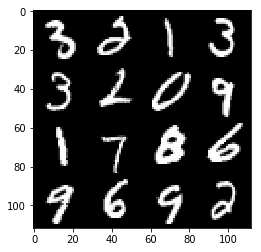

Reconstructed Images


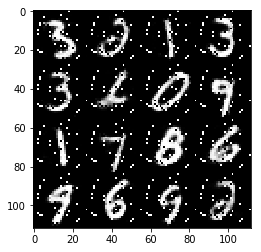

In [15]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()